<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/statistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment on Statistics**

In [4]:
import pandas as pd
df = pd.read_csv('/content/Students_Performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


1. An Institution wishes to find out their student’s ability in
mathematics, reading and writing skills. The Institution
wants to do an exploratory study to check the following
information.

  a. Find out how many males and females participated in
the test.

In [5]:
gender_counts = df['gender'].value_counts()

print(f"Number of males: {gender_counts['male']}")
print(f"Number of females: {gender_counts['female']}")


Number of males: 482
Number of females: 518


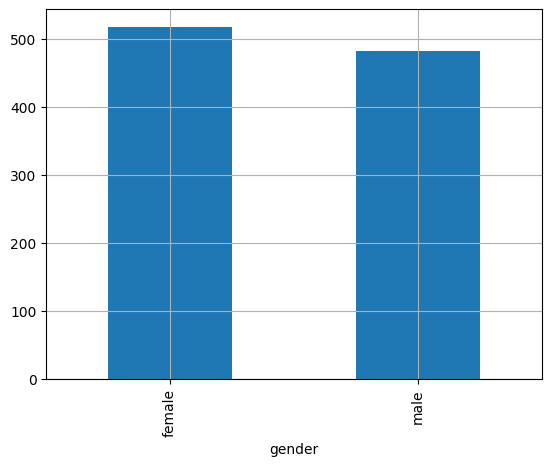

In [6]:
df['gender'].value_counts().head().plot(kind='bar', grid="true");

b. What do you think about the students' parental level of
education?

In [16]:
import scipy.stats as stats

contingency_table = pd.crosstab(df['parental level of education'], df['gender'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
  print("There is a statistically significant relationship between parental education and student gender.")
else:
  print("There is no statistically significant relationship between parental education and student gender.")


Chi-square statistic: 3.384904766004173
P-value: 0.6408699721807456
Degrees of freedom: 5
There is no statistically significant relationship between parental education and student gender.


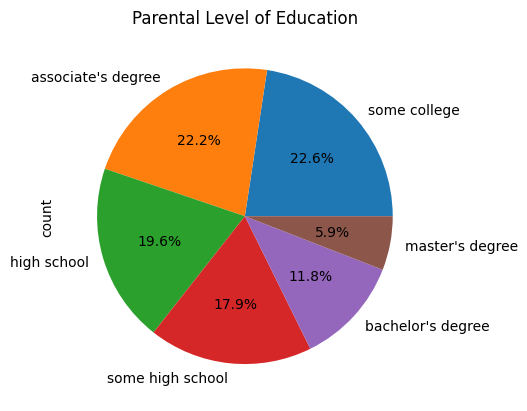

In [13]:
plt.title("Parental Level of Education")
df['parental level of education'].value_counts().head(6).plot(kind='pie',autopct='%0.1f%%');


c. Who scores the most on average for math, reading and
writing based on

i. Gender

ii. Test preparation course

<Figure size 1000x600 with 0 Axes>

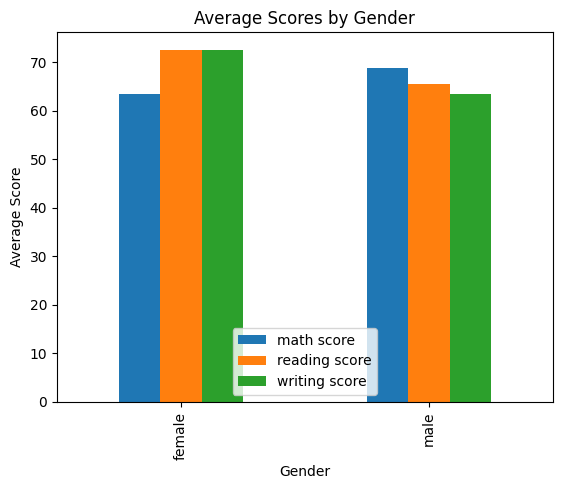

<Figure size 1000x600 with 0 Axes>

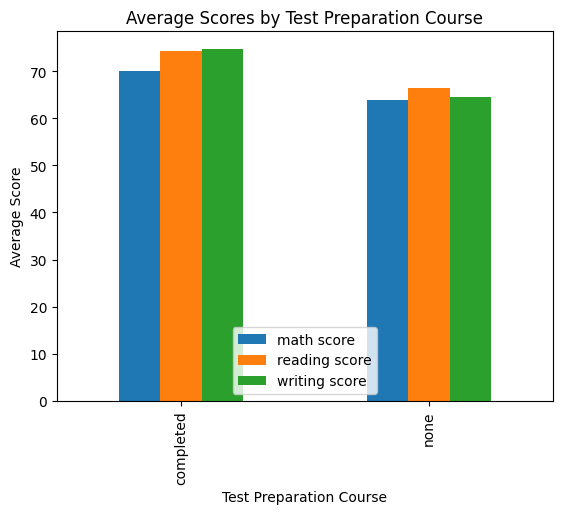

In [ ]:
#Calculate average scores for each subject, grouped by gender
avg_scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Create a bar chart to visualize average scores by gender
plt.figure(figsize=(10, 6))
avg_scores_by_gender.plot(kind='bar')
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()

# Calculate average scores for each subject, grouped by test preparation course
avg_scores_by_test_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Create a bar chart to visualize average scores by test preparation course
plt.figure(figsize=(10, 6))
avg_scores_by_test_prep.plot(kind='bar')
plt.title('Average Scores by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show();


d. What do you think about the scoring variation for
math, reading and writing based on

i. Gender

ii. Test preparation cours

In [23]:
# Calculate the variance for each subject, grouped by gender
math_score_variance_by_gender = df.groupby('gender')['math score'].var()
reading_score_variance_by_gender = df.groupby('gender')['reading score'].var()
writing_score_variance_by_gender = df.groupby('gender')['writing score'].var()

# Perform F-tests to compare the variances
math_f_statistic, math_p_value = stats.f_oneway(df[df['gender'] == 'male']['math score'],df[df['gender'] == 'female']['math score'])
reading_f_statistic, reading_p_value = stats.f_oneway(df[df['gender'] == 'male']['reading score'],df[df['gender'] == 'female']['reading score'])
writing_f_statistic, writing_p_value = stats.f_oneway(df[df['gender'] == 'male']['writing score'],df[df['gender'] == 'female']['writing score'])

print("Math Score Variance by Gender:")
print(f"F-statistic: {math_f_statistic:.4f}")
print(f"P-value: {math_p_value:.4f}")

print("Reading Score Variance by Gender:")
print(f"F-statistic: {reading_f_statistic:.4f}")
print(f"P-value: {reading_p_value:.4f}")

print("Writing Score Variance by Gender:")
print(f"F-statistic: {writing_f_statistic:.4f}")
print(f"P-value: {writing_p_value:.4f}")


Math Score Variance by Gender:
F-statistic: 31.4694
P-value: 0.0000
Reading Score Variance by Gender:
F-statistic: 60.7228
P-value: 0.0000
Writing Score Variance by Gender:
F-statistic: 95.9722
P-value: 0.0000


<Figure size 1000x700 with 0 Axes>

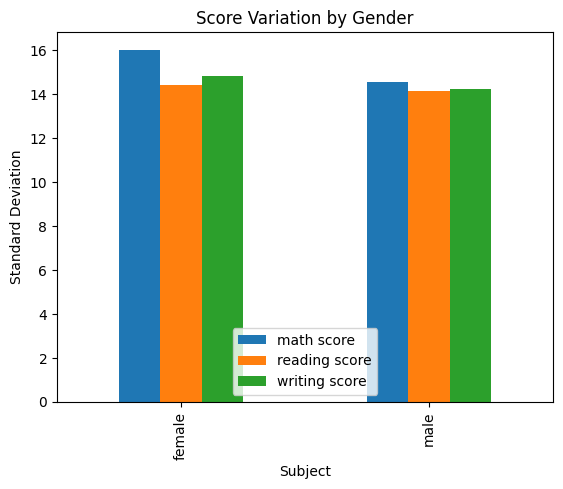

<Figure size 1000x700 with 0 Axes>

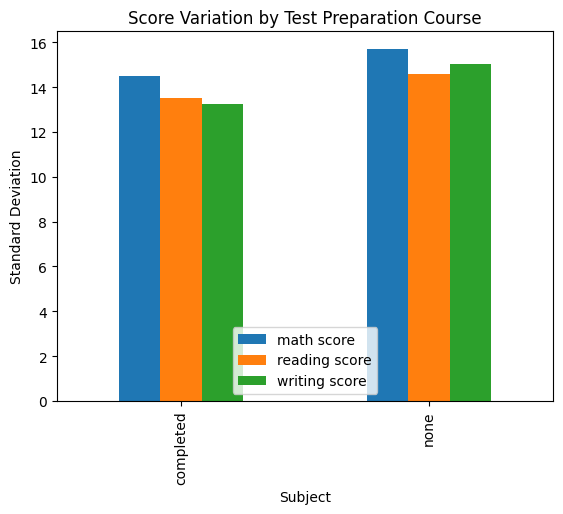

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the standard deviation for each subject, grouped by gender
score_variation_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].std()

plt.figure(figsize=(10, 7))
score_variation_by_gender.plot(kind='bar')
plt.title('Score Variation by Gender')
plt.xlabel('Subject')
plt.ylabel('Standard Deviation')
plt.show()

# Calculate the standard deviation for each subject, grouped by test preparation course
score_variation_by_test_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].std()

plt.figure(figsize=(10, 7))
score_variation_by_test_prep.plot(kind='bar')
plt.title('Score Variation by Test Preparation Course')
plt.xlabel('Subject')
plt.ylabel('Standard Deviation')
plt.show();


e. The management needs your help to give bonus points
to the top 25% of students based on their math score,
so how will you help the management to achieve this.

In [32]:
import scipy.stats as stat

math_75th_percentile = stats.scoreatpercentile(df['math score'], 75)

top_25_students = df[df['math score'] > math_75th_percentile]

top_25_students['bonus_points'] = 5

print(top_25_students)


     gender race/ethnicity parental level of education         lunch  \
430  female        group A                some college      standard   
431  female        group B           bachelor's degree  free/reduced   
432  female        group D           bachelor's degree      standard   
433  female        group D                 high school      standard   
434  female        group D           bachelor's degree  free/reduced   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  \
430               completed          78             87        

<ipython-input-32-c4092a84616b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_students['bonus_points'] = 5





**Case Study on Testing of Hypothesis**




In [68]:
import pandas as pd
df = pd.read_csv('/Sales_add.csv')
df.head(10)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


2. A company started to invest in digital marketing as a new
way of their product promotions. For that they collected
data and decided to carry out a study on it.

  a. The company wishes to clarify whether there is any
increase in sales after stepping into digital marketing.

In [ ]:
import pandas as pd
import scipy.stats as stats
null_hypothesis = "There is no increase in sales after stepping into digital marketing."
alternative_hypothesis = "There is an increase in sales after stepping into digital marketing."

Sales_before_digital_add = df['Sales_before_digital_add']
Sales_After_digital_add= df['Sales_After_digital_add']

t_statistic, p_value = stats.ttest_rel(Sales_before_digital_add, Sales_After_digital_add)


alpha = 0.05

if p_value < alpha:
  print(f"Reject the null hypothesis. {alternative_hypothesis}")
else:
  print(f"Fail to reject the null hypothesis. {null_hypothesis}")


b. The company needs to check whether there is any
dependency between the features “Region” and
“Manager”.

In [73]:

contingency_table = pd.crosstab(df['Region'], df['Manager'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

if p < alpha:
  print("There is a statistically significant dependency between Region and Manager.")
else:
  print("There is no statistically significant dependency between Region and Manager.")


There is no statistically significant dependency between Region and Manager.
